# Student Performance Indicator

### Life Cycle of This Project:

- Understanding the Problem Statement
- Data Collection
- Perform Data Checks
- Exploratory Data Analysis
- Data Preprocessing
- Model Training
- Choosing Best Performing Model

### 1. Problem Statement
The goal of this project is to understand the influence of the parents background, test preparation, and various other variables on the students performance. 

### 2. Data Collection
- Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

- The dataset is designed for data science training and is fictional. It includes scores from three exams and a variety of personal, social, and economic factors that have interaction effects upon them.

- Consists of 8 columns and 1000 rows.

### 2.1 Import Necessary Libraries

In [101]:
import warnings
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

### 2.2 Read the dataset as a dataframe

In [102]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [103]:
df.shape

(1000, 8)

### 2.3 Dataset Information

- Gender: Sex of a student (Male/Female)
- Race/ethnicity: Ethnicity of a student (Group A,B,C,D,E)
- Parental level of education : parents' final education (bachelor's degree,some college,master's degree,associate's degree,high school)
- Lunch : having lunch before test (standard or free/reduced)
- Test preparation course : complete or not complete before test
- Math score
- Reading score
- Writing score

### 3. Perform Data Checks

- Check Missing values
- Check Duplicates
- Check Datatypes
- Check the number of unique values in each column
- Check statistics of the  dataset
- Check various categories present in the different categorical column

#### 3.1 Checking Missing Values

In [104]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in this dataset. If there were any, we would either drop those values or use Imputation.

#### 3.2 Checking Duplicate Values

In [105]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in this dataset. If there were any, we would drop them using df.drop_duplicates()

#### 3.3 Checking the datatypes of columns

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values in each column

In [107]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Generally, the higher the number of unique values of a certain column, the higher the chance of it being continuous variable.

#### 3.5 Checking statistics of the dataset.

In [108]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights from the statistics:
- The students' average performance on all three courses is similar. The mean of all three courses is close and between 66 and 68.1

- The standard deviation is also very close of all three courses.

- Reading score has the highest minimum of 17

#### 3.6 Checking various categories in each column.

In [109]:
for col in df.columns:
    if col not in ['math score', 'reading score', 'writing score']:
        print(f'Categories in {col}: {df[col].unique()}')

Categories in gender: ['female' 'male']
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch: ['standard' 'free/reduced']
Categories in test preparation course: ['none' 'completed']


### 4. Exploring and Visualization Data 

To make data exploration and visualization more informative, we can perform feature engineering by adding two more columns to gain more insights, namely, 'Total score' and 'Average score'.

In [110]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average Score'] = df['Total Score'] / 3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [111]:
print('Number of students having more than or equal to 200 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200])))

print('Number of students having more than or equal to 70 average marks: {0}'.format(
    len(df[df['Average Score'] >= 70])))

Number of students having more than or equal to 200 total marks: 556
Number of students having more than or equal to 70 average marks: 459


In [112]:
print('Number of females having more than or equal to 70 marks in maths: {0}'.format(
    len(df[df['math score'] >= 70][df['gender'] == 'female'])))

print('Number of males having more than or equal to 70 marks in maths: {0}'.format(
    len(df[df['math score'] >= 70][df['gender'] == 'male'])))

Number of females having more than or equal to 70 marks in maths: 178
Number of males having more than or equal to 70 marks in maths: 231


We can see that males have performed better in mathematics compared to females.

In [113]:
print('Number of females having more than or equal to 250 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200][df['gender'] == 'female'])))

print('Number of males having more than or equal to 250 total marks: {0}'.format(
    len(df[df['Total Score'] >= 200][df['gender'] == 'male'])))


Number of females having more than or equal to 250 total marks: 317
Number of males having more than or equal to 250 total marks: 239


In [114]:
# defining numerical and categorcal columns 
numeric_features = [ feature for feature in df.columns  if df[feature].dtype!='O' ]
categorical_features = [ feature for feature in df.columns  if df[feature].dtype =='O' ]
numeric_features

['math score',
 'reading score',
 'writing score',
 'Total Score',
 'Average Score']

In [115]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

However, in terms of total score, females have outperformed males.

#### 4.1 Visualizing Data

Let us visualize average score distribution and make some conclusions.

- Histogram
- Kernel Distribution Function

In [116]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


[]

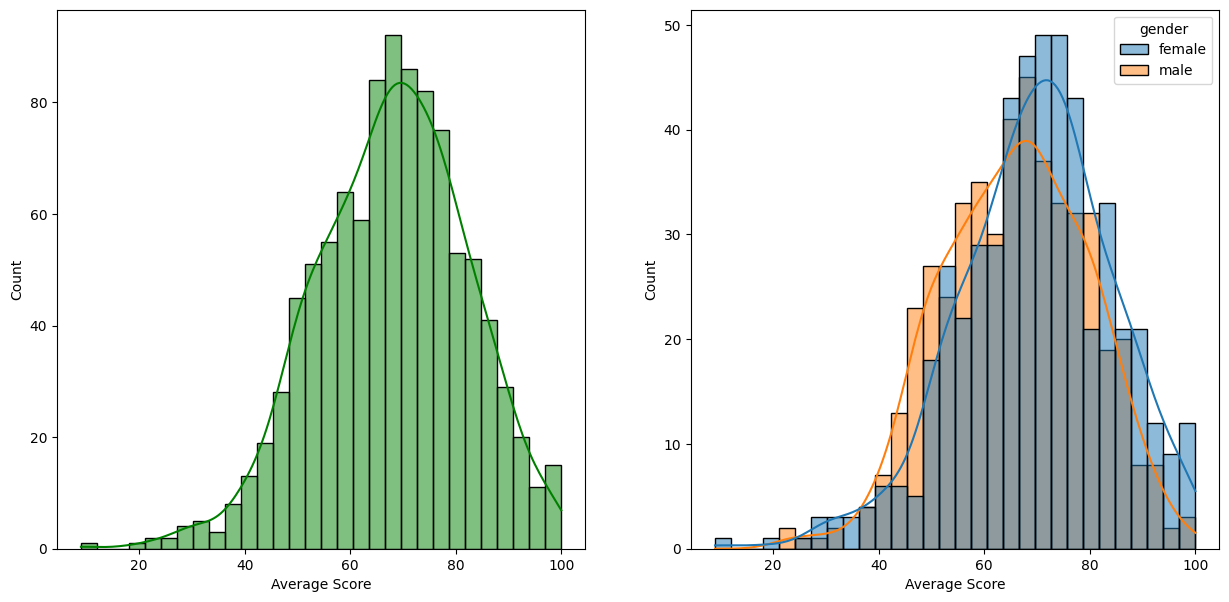

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average Score', bins=30, kde=True, color='green')
plt.subplot(122)
sns.histplot(data=df, x='Average Score', bins=30, kde=True, hue='gender')
plt.plot()

- First, the majority of students have an average score that is between ~ 60 and 80.
- Second, we can see in the second graph that more females have gotten higher average scores than boys.

Visualize total score distribution

[]

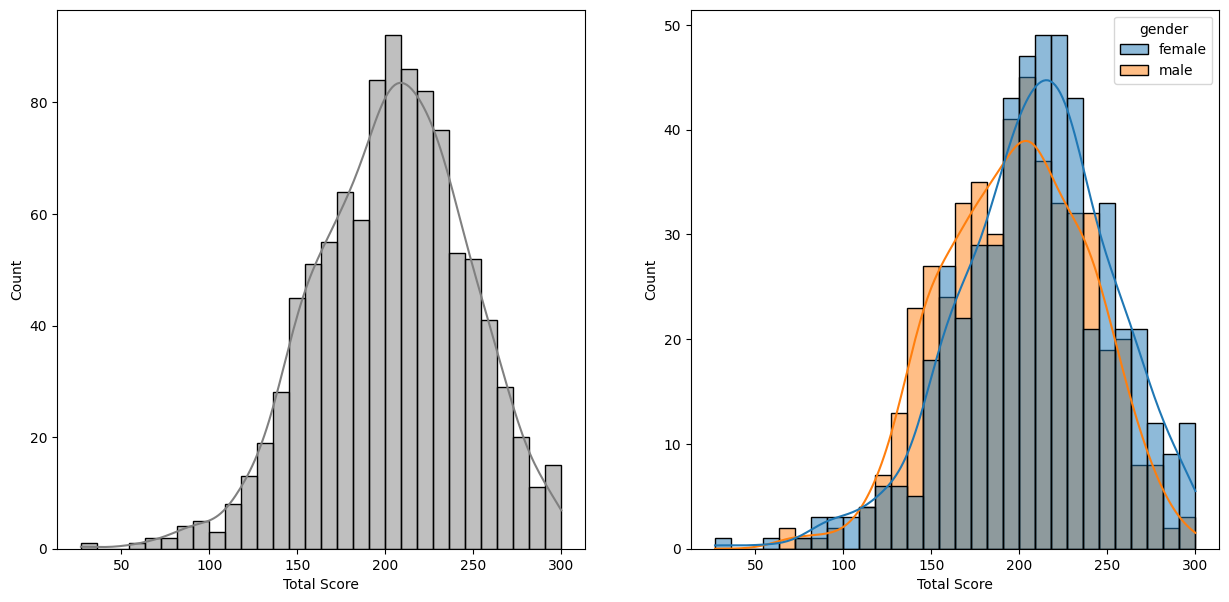

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='grey')
plt.subplot(122)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, hue='gender')
plt.plot()

- The majority of students have a total score that is between ~ 180 and 240.
- We can see in the second graph that more females have gotten higher total scores than boys.

- Female students tend to perform better overall compared to male students in this case.

Math score distribution based on gender

[]

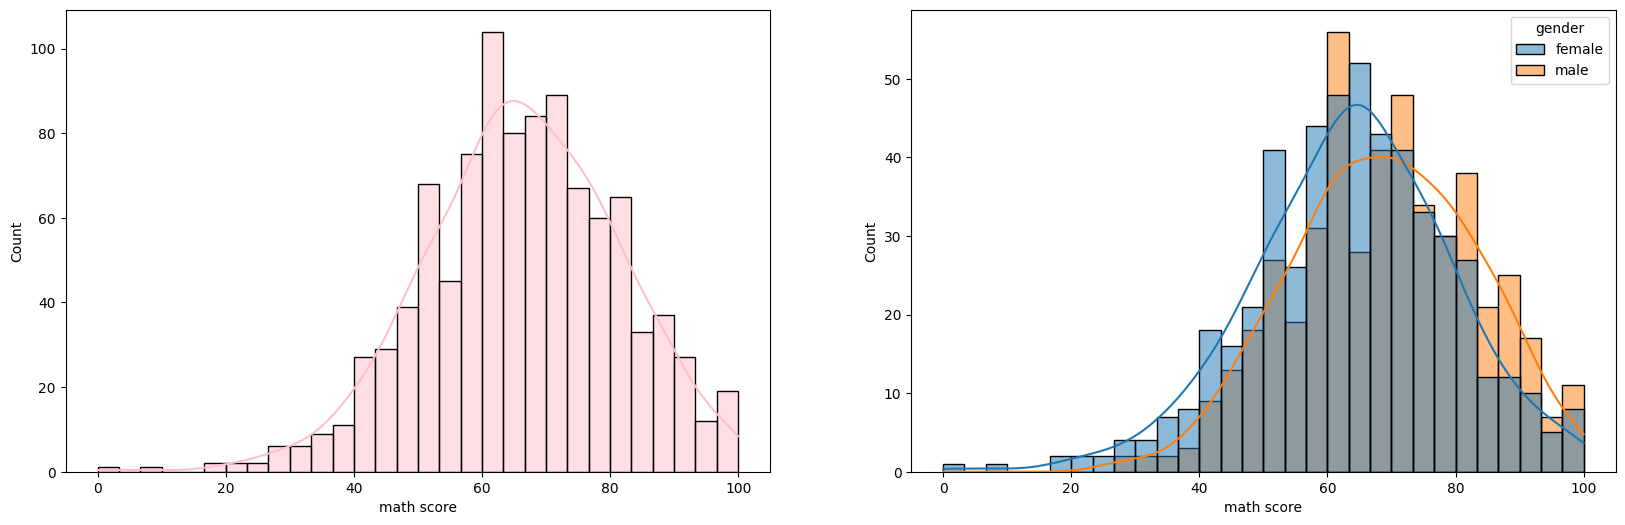

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.subplot(121)
sns.histplot(data=df, x='math score', bins=30, kde=True, color='pink')
plt.subplot(122)
sns.histplot(data=df, x='math score', bins=30, kde=True, hue='gender')
plt.plot()

In terms of math score, males have performed better compared to females.

Let us now see the average score distribution based on the variable lunch.

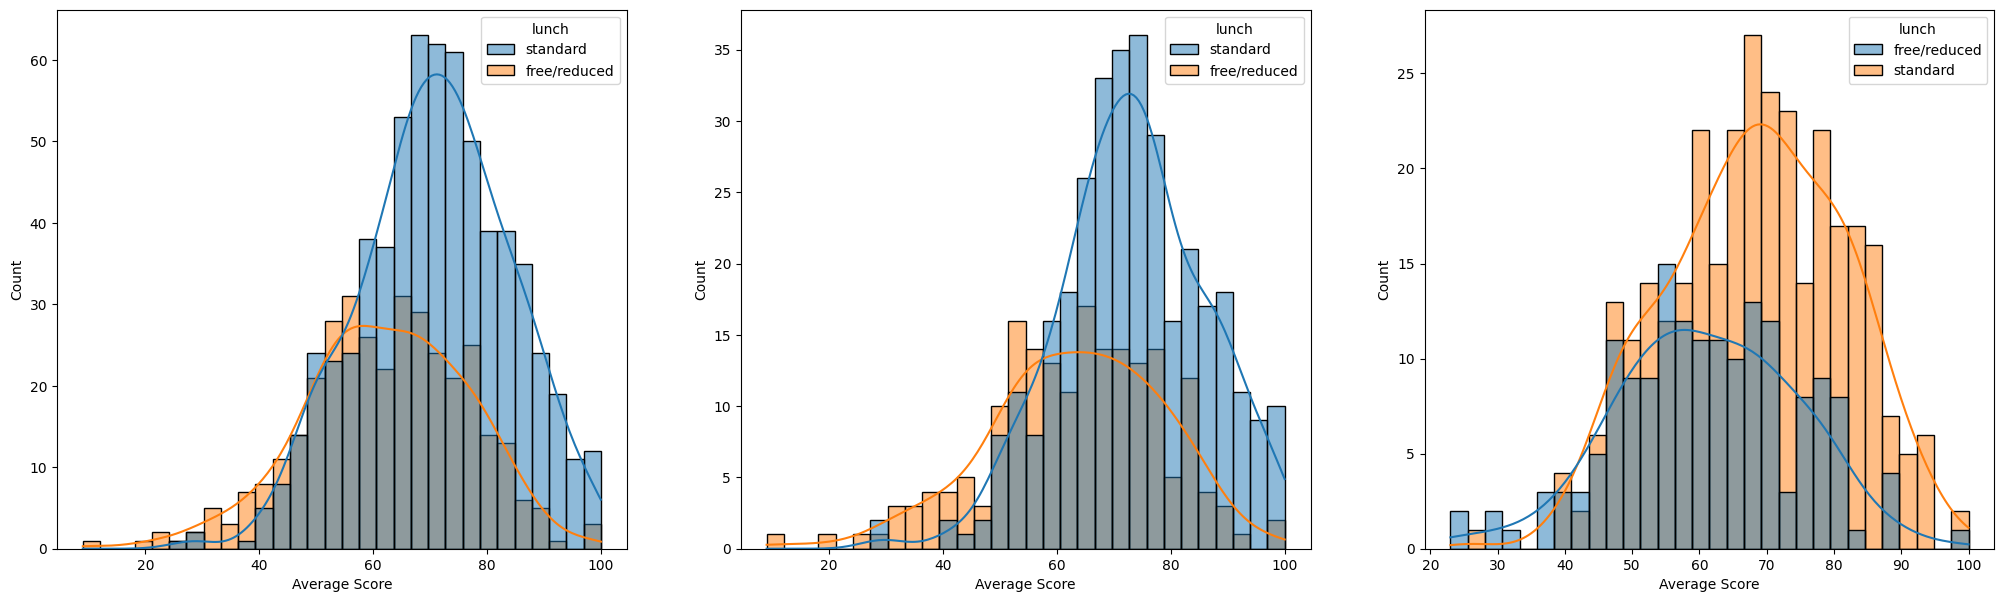

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(131)
sns.histplot(data=df, x='Average Score', bins=30, kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='Average Score', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],
             x='Average Score', bins=30, kde=True, hue='lunch')
plt.show()

Insights:
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

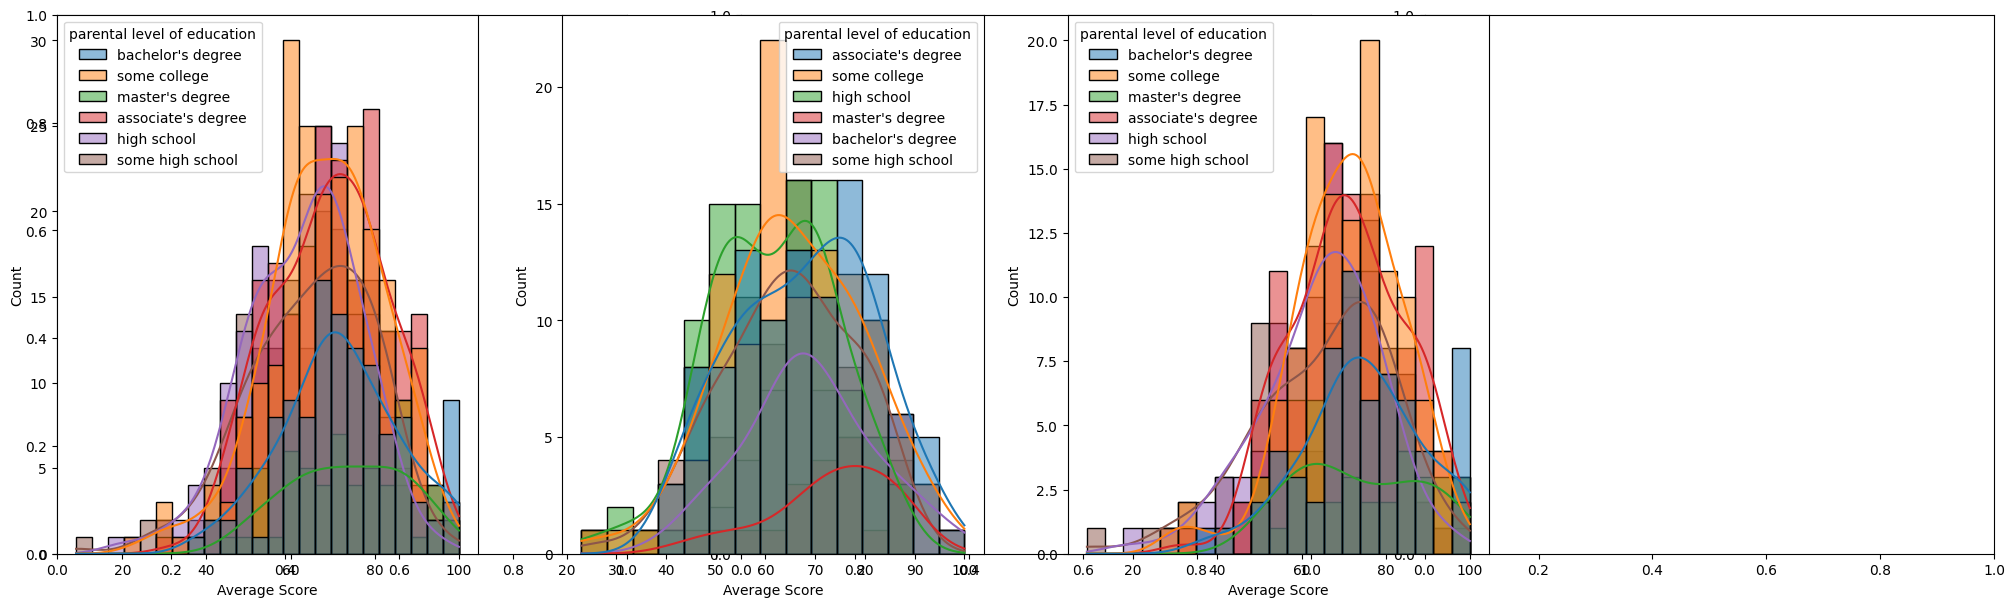

In [121]:
plt.subplots(1, 3, figsize=(25, 7))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average Score', kde=True,
                  hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'male'], x='Average Score',
                  kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'female'], x='Average Score',
                  kde=True, hue='parental level of education')
plt.show()

Insights:
- First graph shows that parents that had some sort of masters or bachelors degree helped their children perform better.
- Second graph shows that male students tend to perform better if they have parents the have associate or bachelors degree.
-  Third graph shows that higher education of parents doesn't really improve the performance of female students. Although, majority of females who got an average score of 100 or closer to 100 have either associate or bachelors degree.

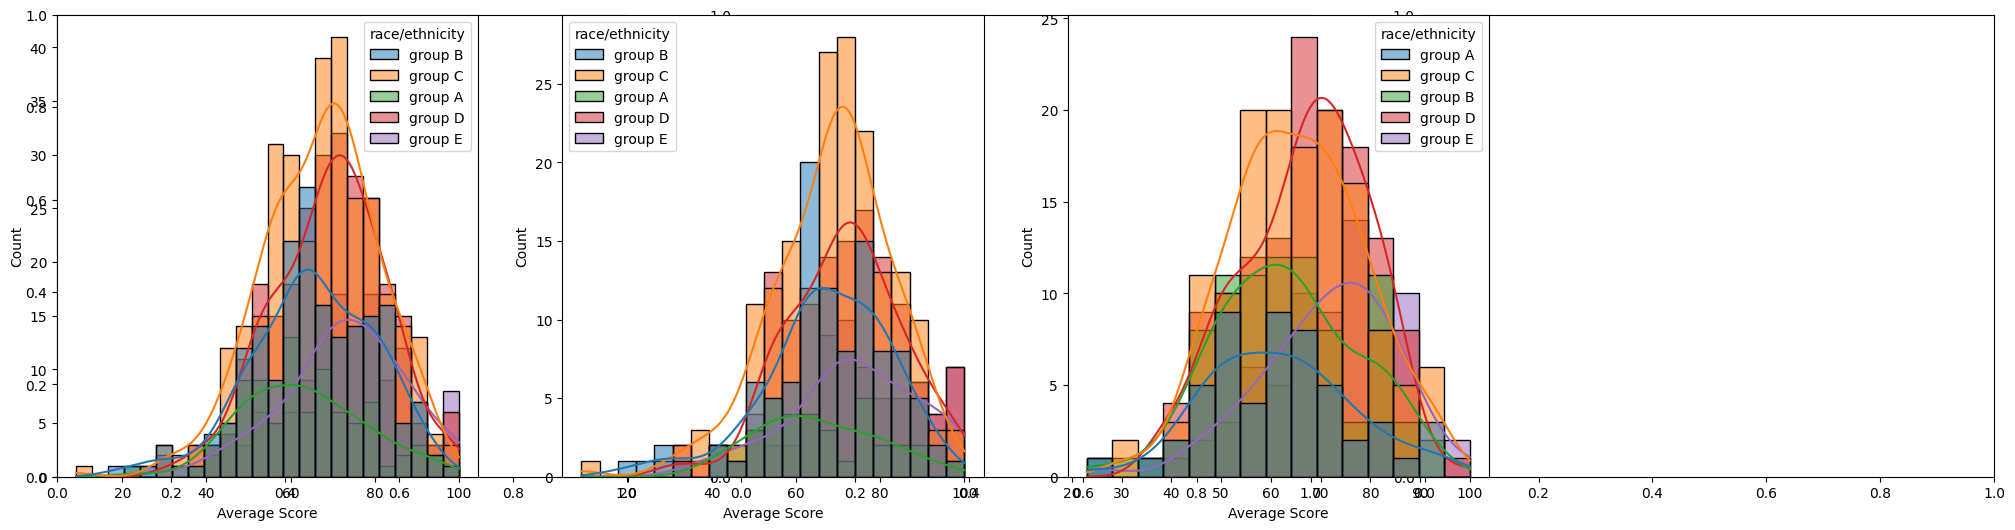

In [122]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='Average Score', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'],
                  x='Average Score', kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'],
                  x='Average Score', kde=True, hue='race/ethnicity')
plt.show()


Insights:
- Group E and D tends to perform better than other groups regardless of the sex.
- Group A and B tend to perform poorly irrespective of their gender.

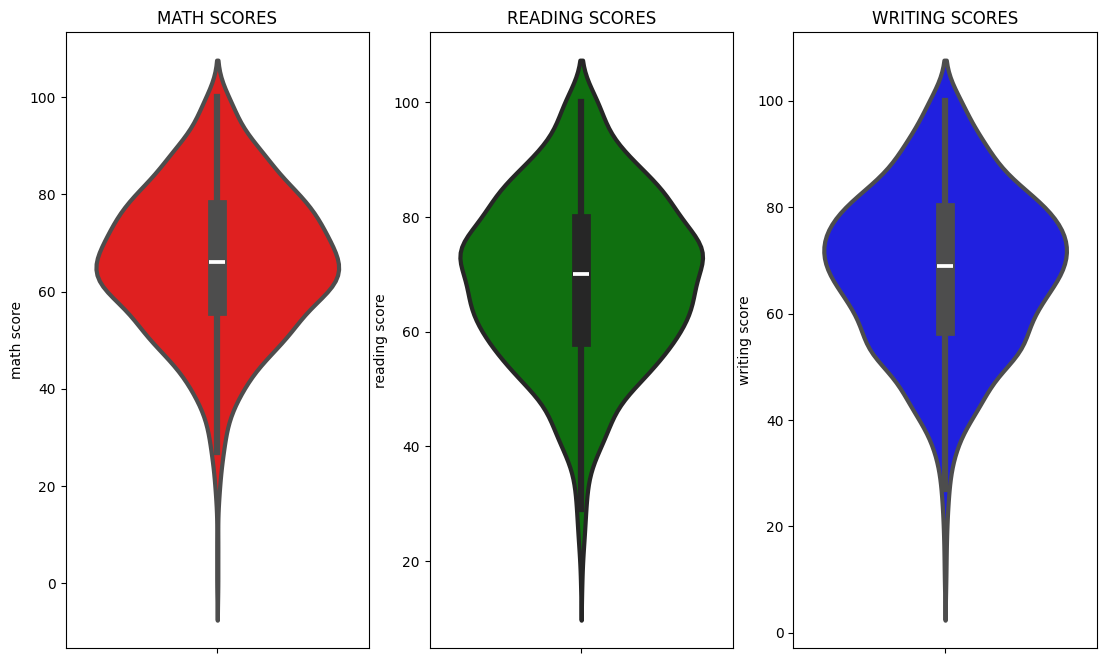

In [123]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

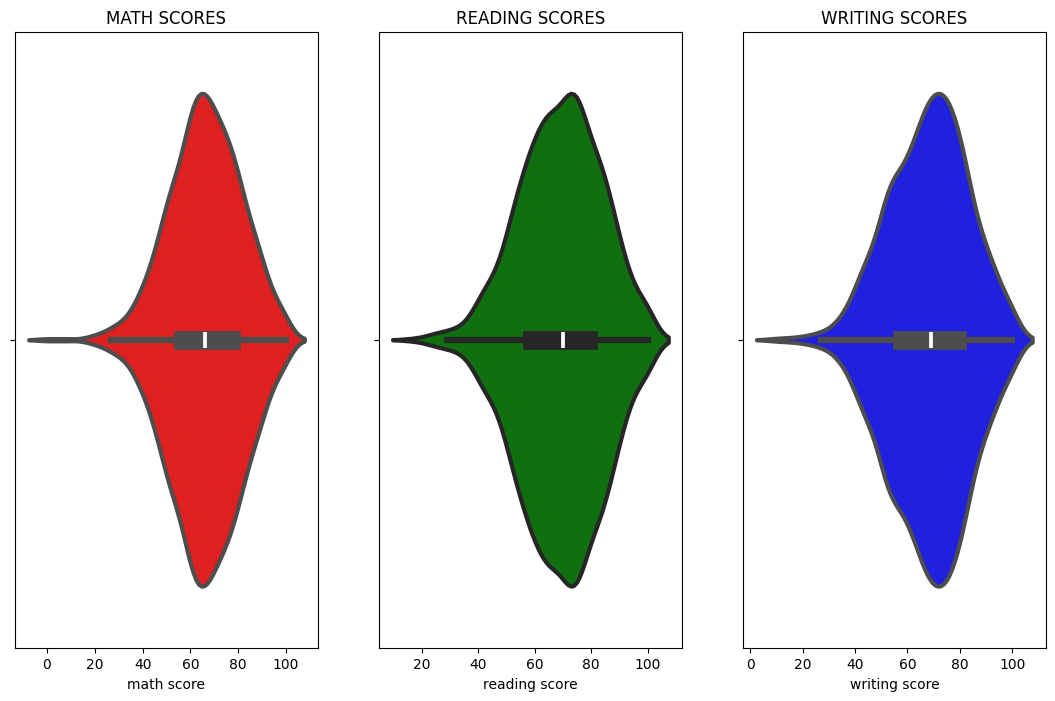

In [124]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(x='math score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(x='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(x='writing score', data=df, color='blue', linewidth=3)
plt.show()


Insights:
- Most of the students have scores in between 60 and 80 in maths.
- Most of the students have scores in between 50 and 80 in reading and writing.

#### 4.1 Multivariate Analysis

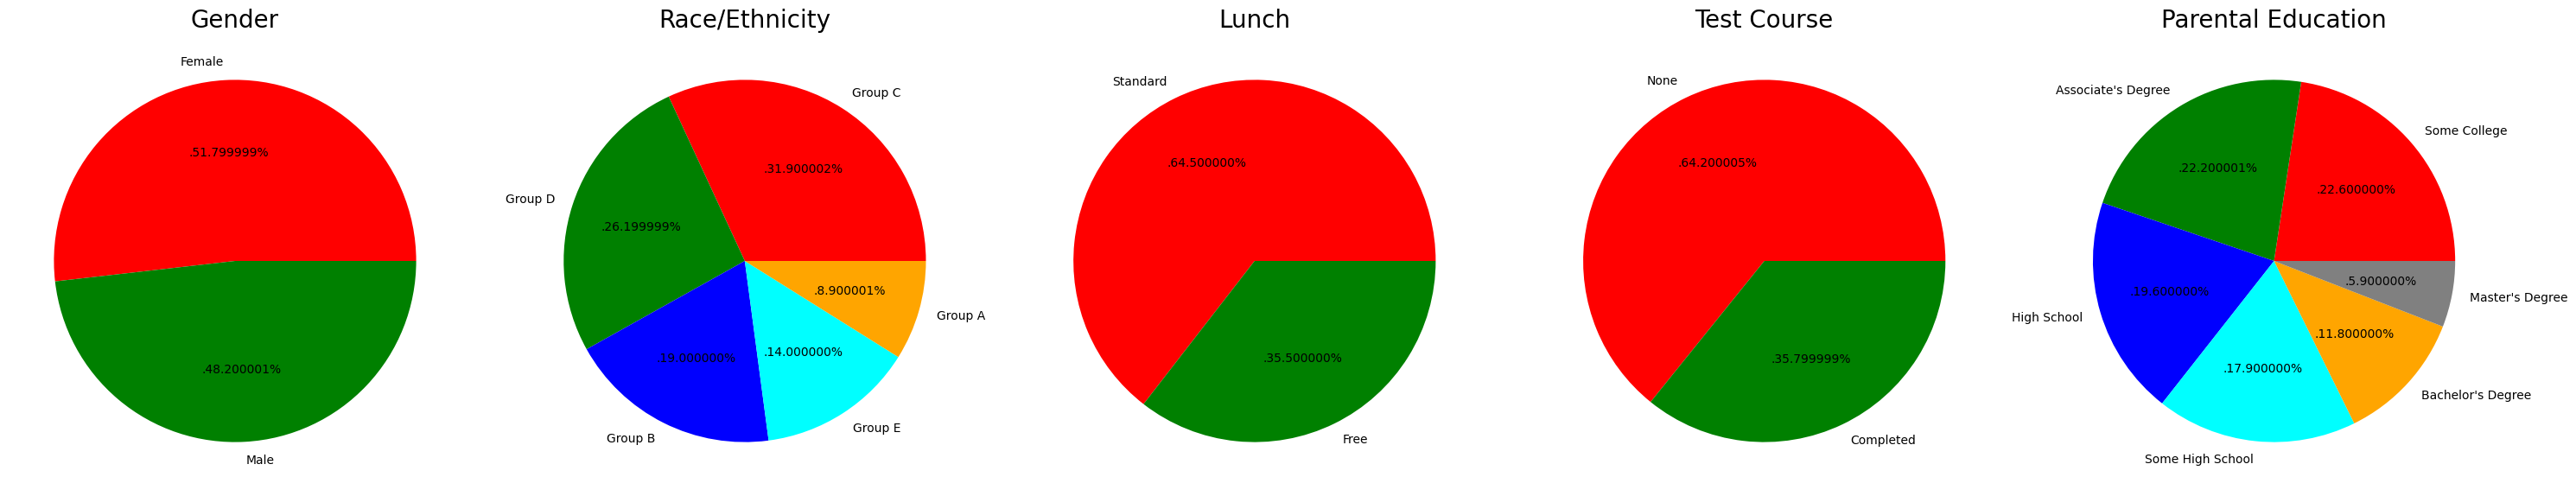

In [125]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Insights:
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.2 Feature Wise Visualization

GENDER COLUMN
- How is distribution of Gender ?
- Does gender have any impact on student's performance ?

Univariate Analysis (Gender Column)

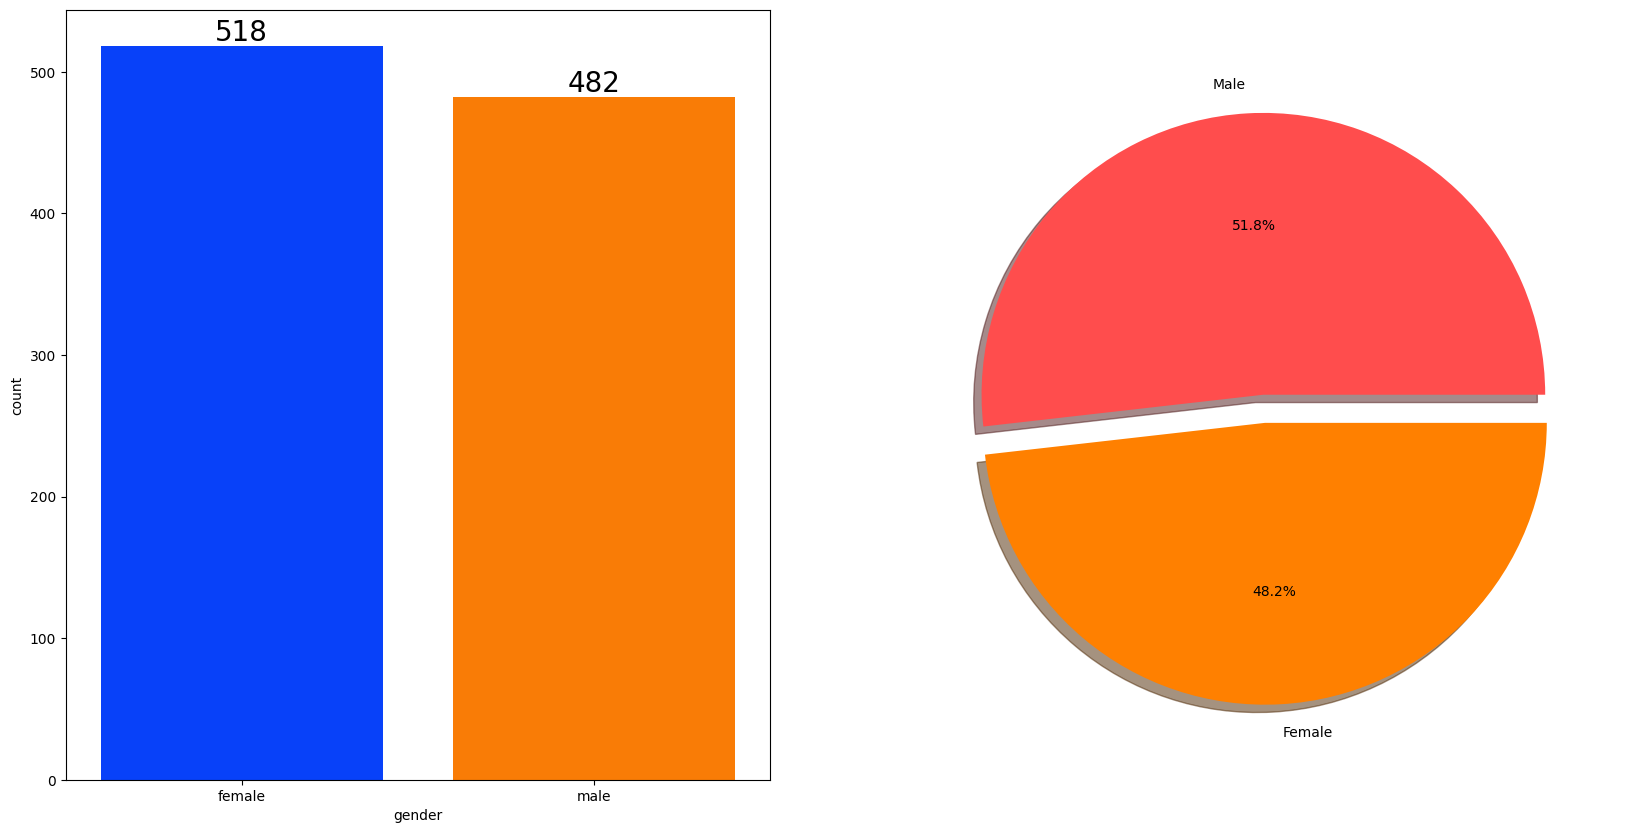

In [126]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright',
              ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[
        0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()

BIVARIATE ANALYSIS ( Does gender have any impact on student's performance ? )

In [127]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: agg function failed [how->mean,dtype->object]

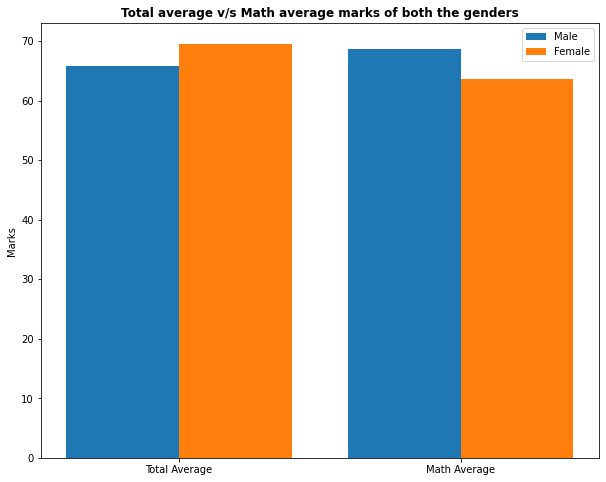

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['Average Score'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average Score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders",
          fontweight='bold')
plt.legend()
plt.show()

Insights:
- The Females have outperformed males in terms of overall score.
- However, males have performed better in terms of math scores compared to females.

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

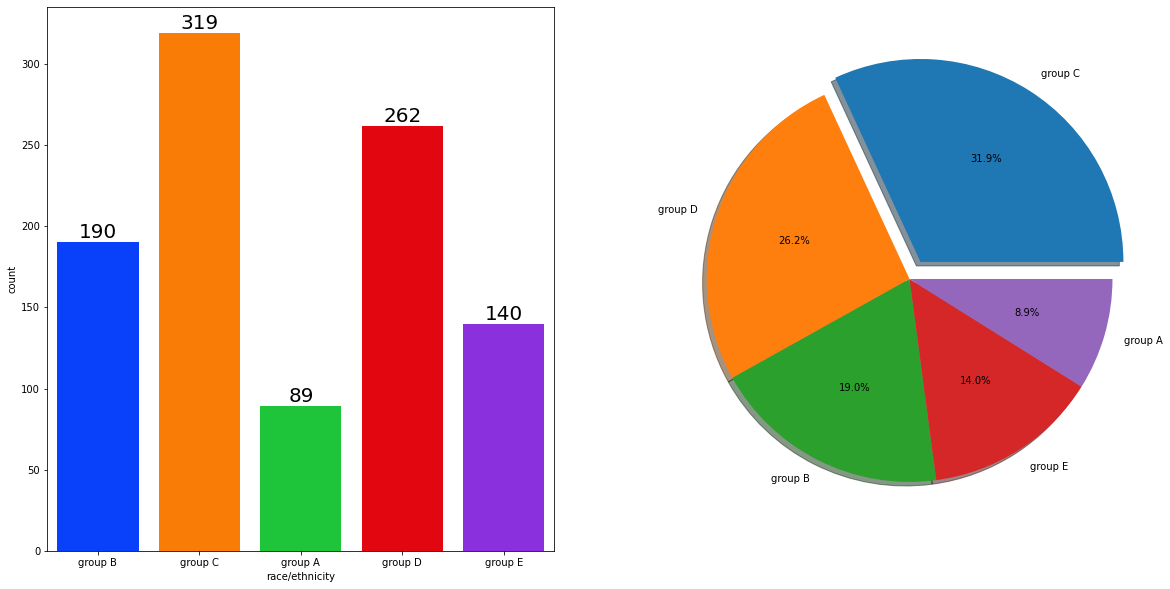

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race/ethnicity'], data=df,
              palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.show()

Insights:
- Most Students belong to Group C and Group D
- Lowest number of people belong to Group A

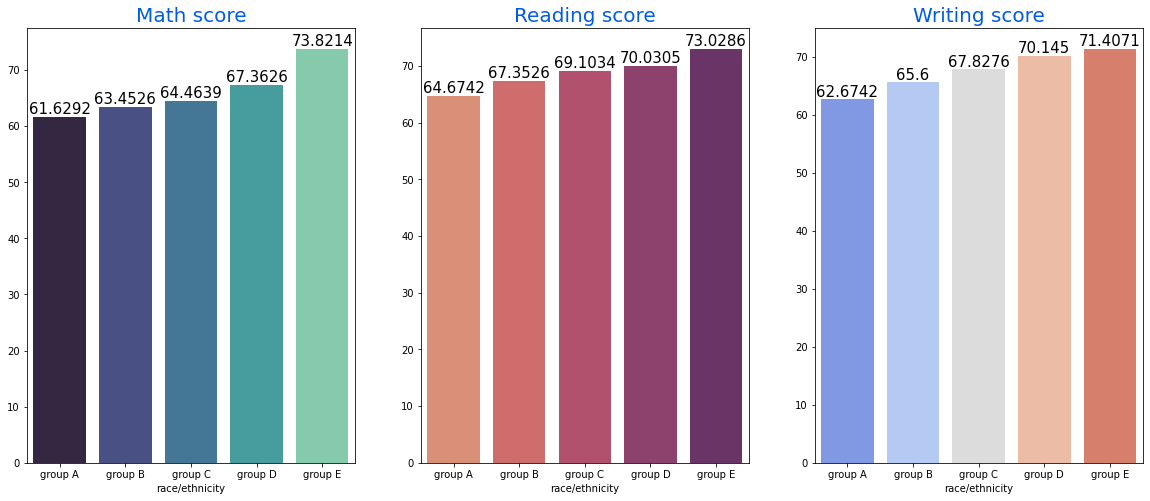

In [ ]:
group_data2 = df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=group_data2['math score'].mean().index, y=group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['reading score'].mean().index,y=group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_data2['writing score'].mean().index,y=group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
- It is shown that Group E has consistently performed the highest in all three subjects.
- Whereas Group A has performed the worst in all three subjects.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

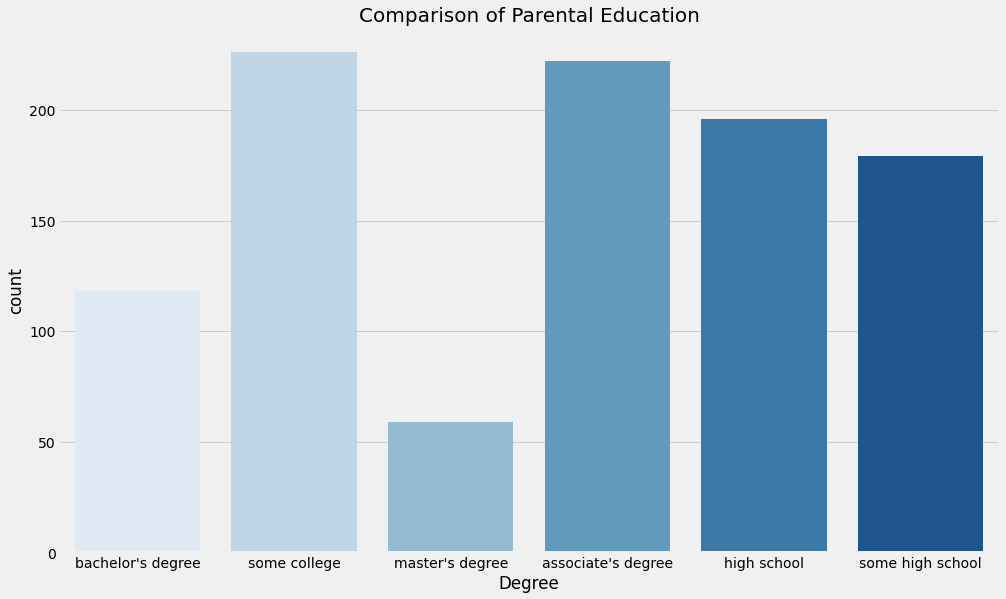

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()  

Insights: 
- Majority of the students' parents have education from some collage.

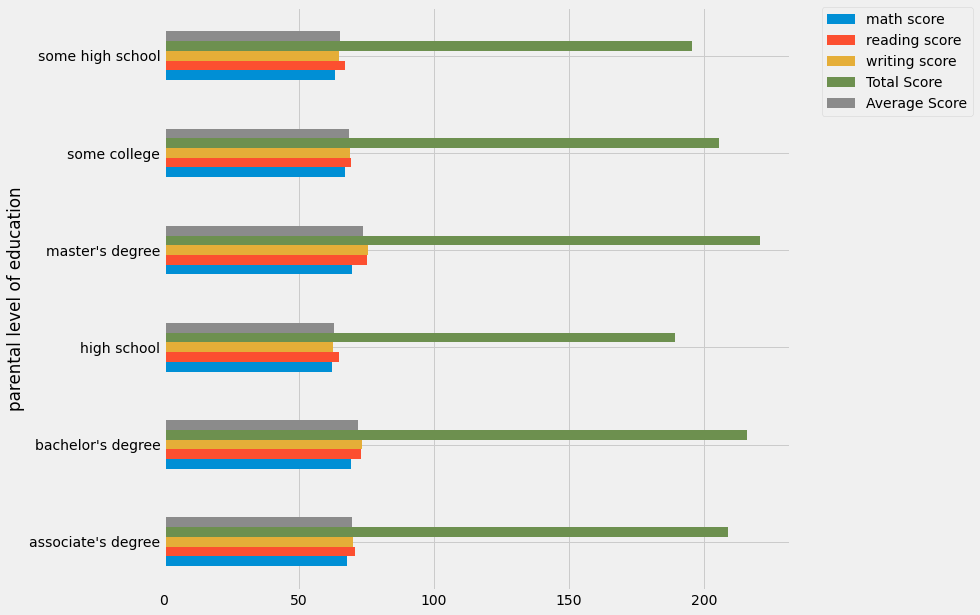

In [ ]:
df.groupby('parental level of education').agg(
    'mean').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights:
- Total score of students' having parents with master's degree is the highest compared to other students.
- Total score of students' having parents with high school education only is lower compared to others.

#### LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

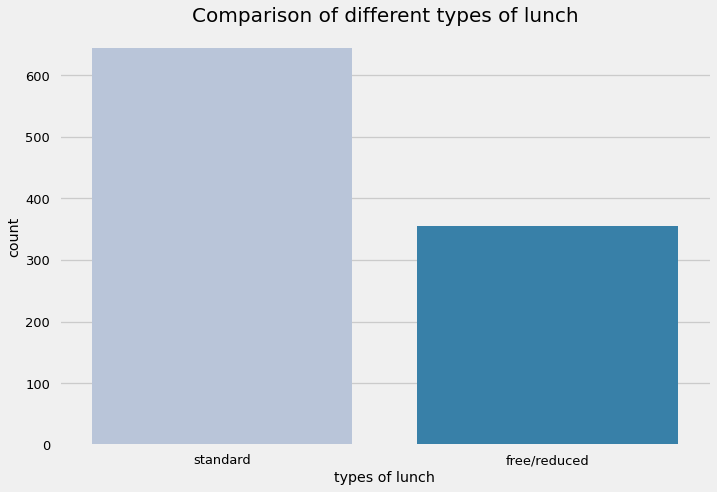

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights:
- Students were served standard lunch more than free/reduced lunch.

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

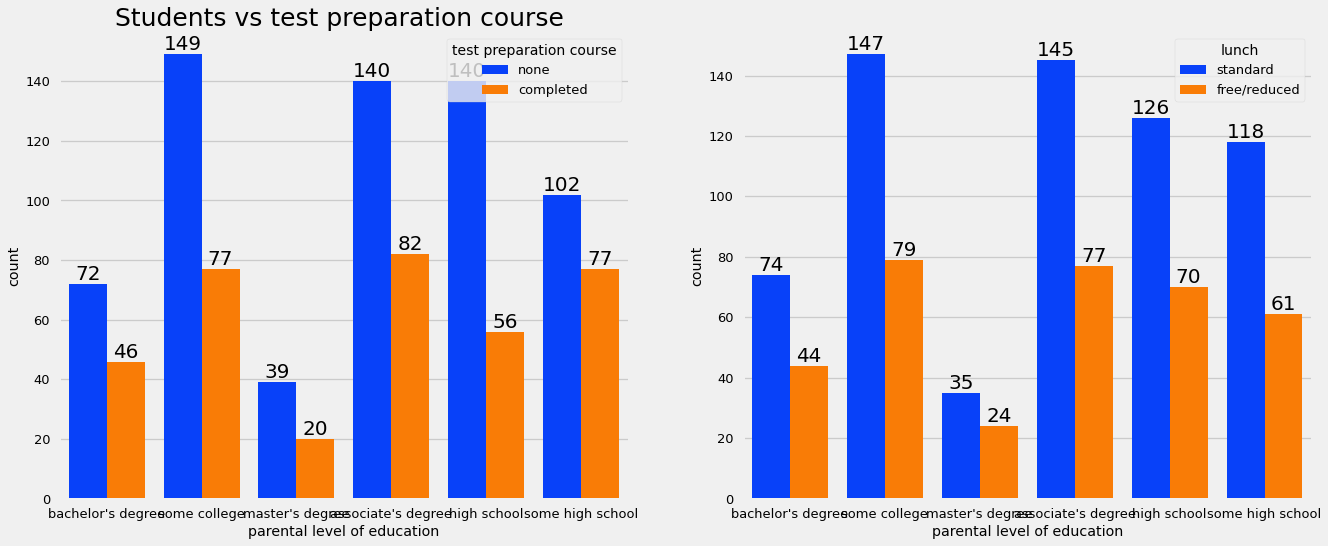

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights:
- Having some sort of preparation before test was beneficial
- Students with standard lunch performed better than students that had free lunch. 

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

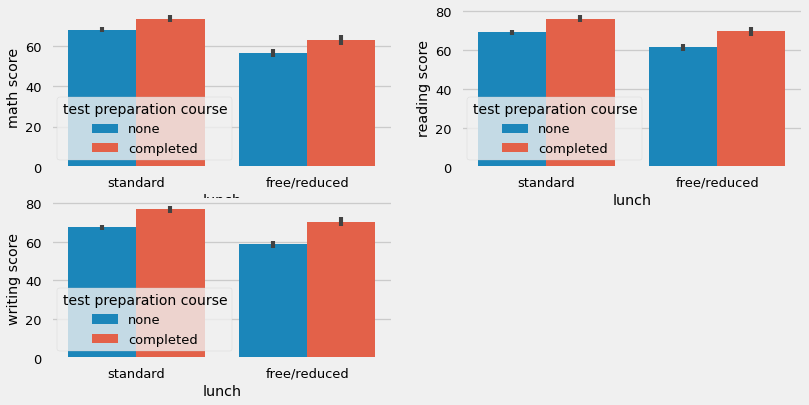

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'],
            hue=df['test preparation course'])
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading score'],
            hue=df['test preparation course'])
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing score'],
            hue=df['test preparation course'])

Insights:
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### Checking Outliers


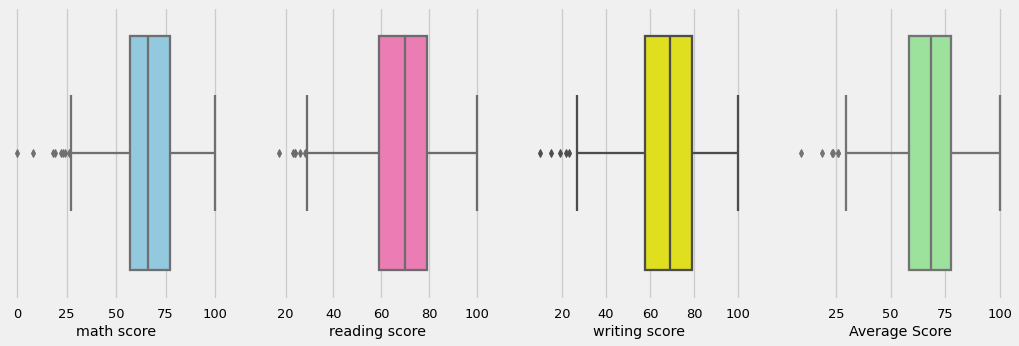

In [ ]:
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['Average Score'], color='lightgreen')
plt.show()

MUTIVARIATE ANALYSIS USING PAIRPLOT

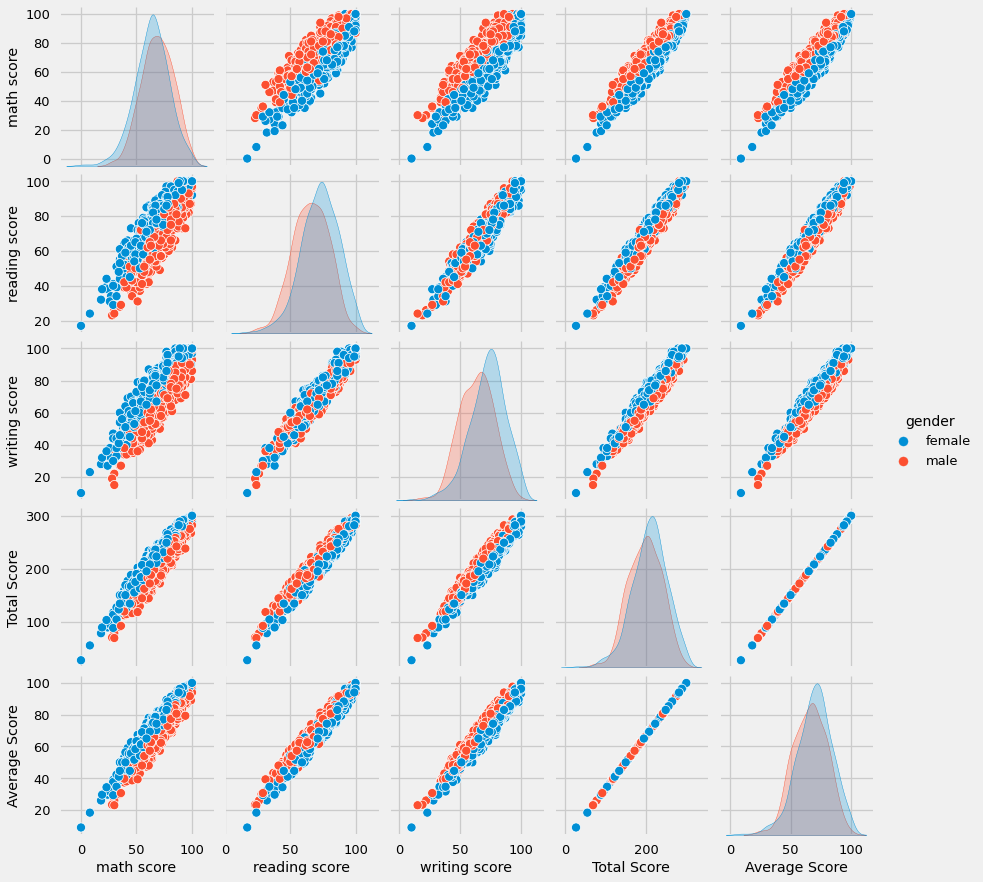

In [ ]:
sns.pairplot(df, hue='gender')
plt.show()


Insights:
- From the above plot it is clear that all the scores increase linearly with each other.

### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.